<a href="https://colab.research.google.com/github/s-majumdar7/DeepLearning/blob/master/Churn_Modelling_Bank_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Employee Retention Prediction
  </td></tr>
</table>


# TASK #2: IMPORT LIBRARIES AND DATASETS

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# You have to include the full link to the csv file containing your dataset
churn_dataset=pd.read_csv('/content/drive/My Drive/Churn_Modelling.csv')

In [9]:
churn_dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
churn_dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# TASK #3: VISUALIZE DATASET

In [12]:
# Let's see if we have any missing data, luckily we don't!
churn_dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
#RowNumber, CustomerId and Surname are not required
churn_dataset.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [14]:
#To know the count of distinct categories within the feature 
churn_dataset['Geography'].value_counts().count()

3

In [15]:
churn_dataset['Gender'].value_counts().count()

2

In [16]:
#Visualising categorical data to see distribution
country_count=churn_dataset['Geography'].value_counts()
print(country_count)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [17]:
gender_count=churn_dataset['Gender'].value_counts()
print(gender_count)

Male      5457
Female    4543
Name: Gender, dtype: int64


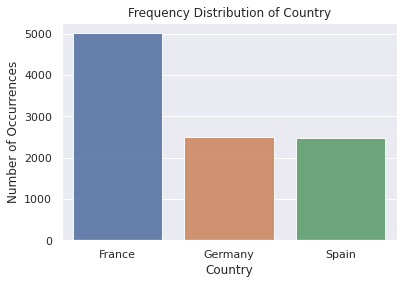

In [18]:
sns.set(style='darkgrid')
sns.barplot(country_count.index, country_count.values, alpha=0.9)
plt.title('Frequency Distribution of Country')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

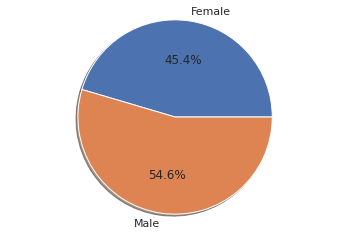

In [19]:
labels = churn_dataset['Gender'].astype('category').cat.categories.tolist()
sizes = [gender_count[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [20]:
# Count the number of customers who stayed and left
# It seems that we are dealing with an imbalanced dataset 
stayed_df=churn_dataset[churn_dataset['Exited']==0]
left_df=churn_dataset[churn_dataset['Exited']==1]

In [21]:
churn_dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


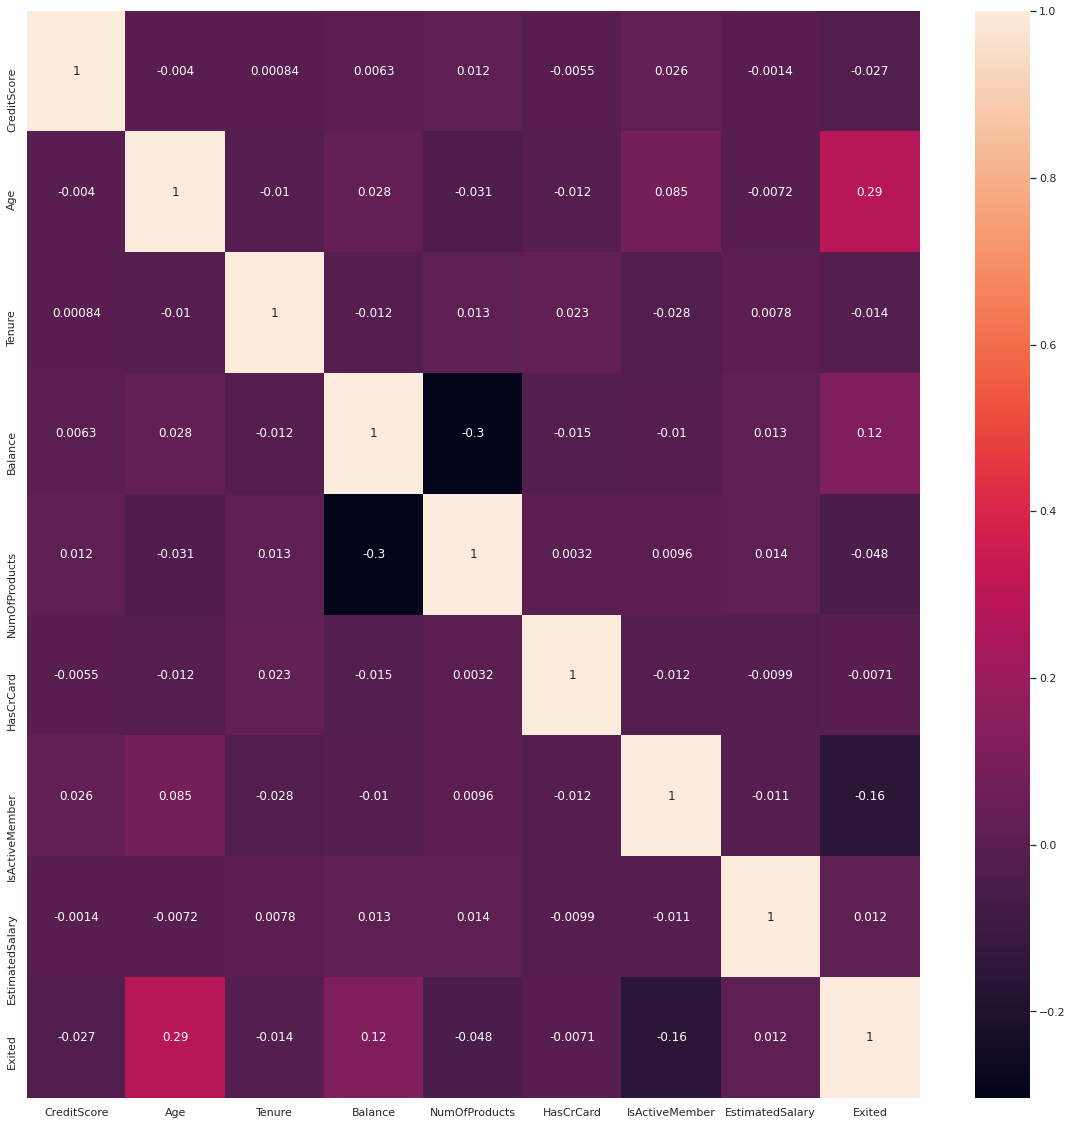

In [22]:
correlations = churn_dataset.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [23]:
# Age is strongly correlated with Exited
# Balance is strongly correlated with Exited

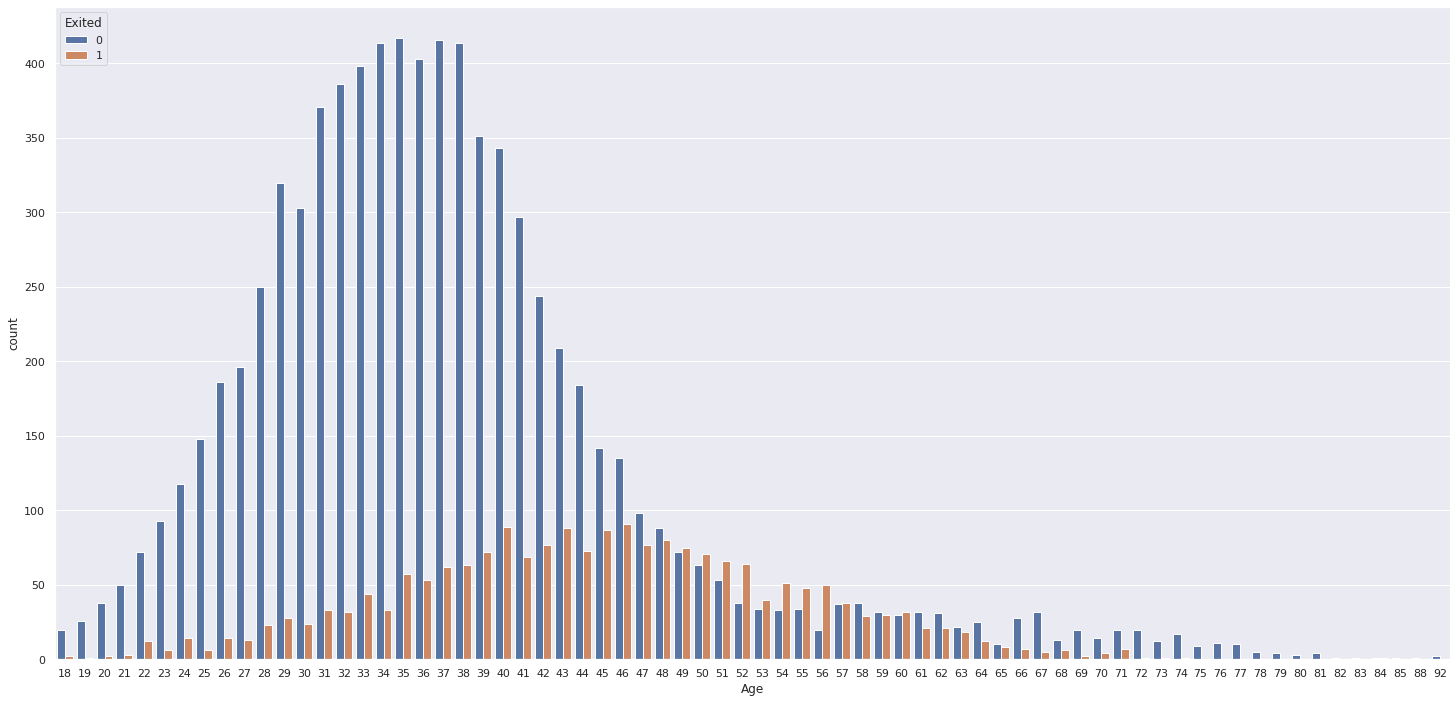

In [24]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Exited', data = churn_dataset)

Text(0.5, 0, 'Balance')

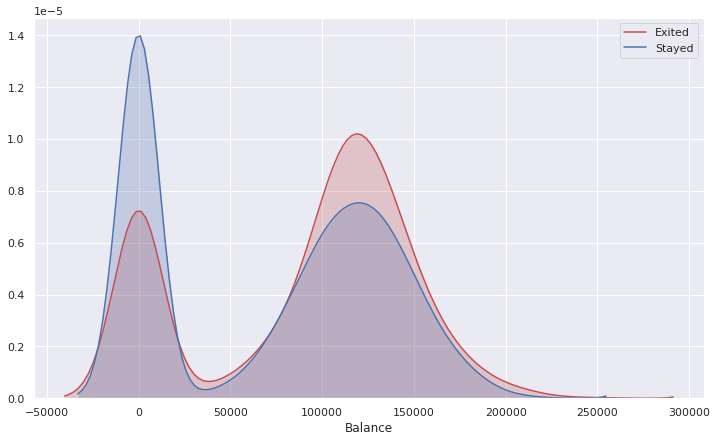

In [25]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['Balance'], label = 'Exited', shade = True, color = 'r')
sns.kdeplot(stayed_df['Balance'], label = 'Stayed', shade = True, color = 'b')

plt.xlabel('Balance')

## Encoding Categorical Values


In [26]:
from sklearn.preprocessing import LabelEncoder
lencoder=LabelEncoder()
churn_dataset['Gender']=lencoder.fit_transform(churn_dataset['Gender'])

In [27]:
churn_dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [28]:
churn_dataset = pd.get_dummies(churn_dataset, columns=['Geography'])
print(churn_dataset.head())

   CreditScore  Gender  ...  Geography_Germany  Geography_Spain
0          619       0  ...                  0                0
1          608       0  ...                  0                1
2          502       0  ...                  0                0
3          699       0  ...                  0                0
4          850       0  ...                  0                1

[5 rows x 13 columns]


In [29]:
churn_dataset.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0


In [30]:
#Creating dependent and independent variables
X=churn_dataset[['Age','Gender','CreditScore','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_France','Geography_Germany','Geography_Spain']]
X.head(3)

,Age,Gender,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,42,0,619,2,0.00,1,1,1,101348.88,1,0,0
1,41,0,608,1,83807.86,1,0,1,112542.58,0,0,1
2,42,0,502,8,159660.80,3,1,0,113931.57,1,0,0


In [31]:
y=churn_dataset['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

##Splitting into Training Set and Test Set

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

##Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Building ANN

In [34]:
import tensorflow as tf

##Initialising ANN

In [35]:
ann=tf.keras.models.Sequential() 

##Adding layers

In [36]:
ann.add(tf.keras.layers.Dense(units=60, activation='relu'))
ann.add(tf.keras.layers.Dense(units=60, activation='relu'))

##Adding output layer

In [37]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

##Complile the ANN

In [38]:
ann.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

##Training ANN on training set

In [39]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.7924
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3920 - accuracy: 0.8353
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8534
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8570
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8571
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8610
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8646
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.8644
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8676
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3265 - accura

##Predicting the Test Set

In [40]:
y_pred=ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [41]:
print(y_pred)

[[ True]
 [False]
 [False]
 ...
 [False]
 [False]
 [ True]]


In [45]:
y_test=y_test.to_numpy()
y_test

array([0, 1, 0, ..., 0, 0, 1])

In [46]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


##Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2204,  175],
       [ 301,  320]])

##Accuracy Score

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8413333333333334